[-4. -3. -2. -1.  0.  1.  2.  3.  4.]
[1.12535175e-07 1.23409804e-04 1.83156389e-02 3.67879441e-01
 1.00000000e+00 3.67879441e-01 1.83156389e-02 1.23409804e-04
 1.12535175e-07]


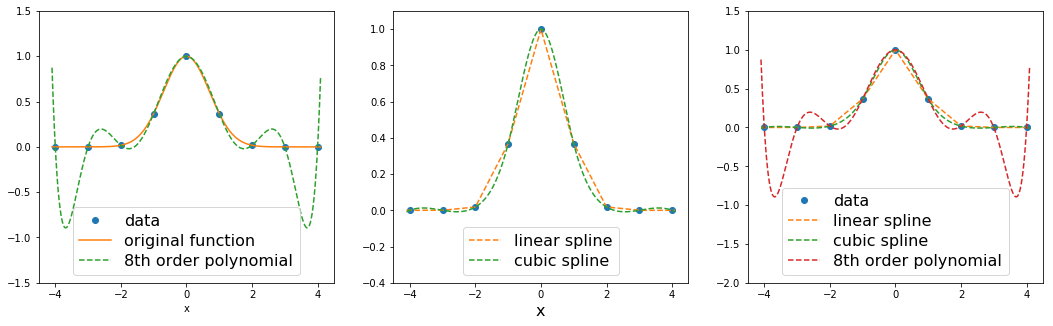

In [12]:
# Exercise 1: interpolation

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# for reference: this is the original function used to produce the data
def f(x):
    return np.exp(-x**2)

x = np.arange(-4.1, 4.1, 0.01)

fig = plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

# this is the data from the exercise
dataX = np.arange(-4.0, 5.0, 1)
dataY = f(dataX)

print(dataX)
print(dataY)

# because we have 9 data points the interpolating polynomial has order 8
interpol = np.poly1d(np.polyfit(dataX, dataY, 8))

# plot of data points and polynomial interpolation (original function included just for reference)
ax1.set_ylim(-1.5,1.5)
ax1.plot(dataX, dataY, 'o', label='data')
ax1.plot(x, f(x), label='original function')
ax1.plot(x, interpol(x), '--', label='8th order polynomial')
ax1.set_xlabel("x")
ax1.legend(loc='lower center', fontsize=16, labelspacing=0.3)

# linear spline
spline1 = interpolate.make_interp_spline(dataX, dataY, 1)

# cubic spline
spline = interpolate.make_interp_spline(dataX, dataY, 3)

ax2.set_ylim(-0.4,1.1)
ax2.plot(dataX, dataY, 'o')
ax2.set_xlabel("x", fontsize=16)
ax2.plot(x, spline1(x), '--', label='linear spline')
ax2.plot(x, spline(x), '--', label='cubic spline')
ax2.legend(loc='lower center', fontsize=16, labelspacing=0.3)

# plotting everything together

ax3.set_ylim(-2,1.5)
ax3.plot(dataX, dataY, 'o', label='data')
ax3.plot(x, spline1(x), '--', label='linear spline')
ax3.plot(x, spline(x), '--', label='cubic spline')
ax3.plot(x, interpol(x), '--', label='8th order polynomial')
ax2.set_xlabel("x", fontsize=16)
ax3.legend(loc='lower center', fontsize=16, labelspacing=0.3)

plt.show()

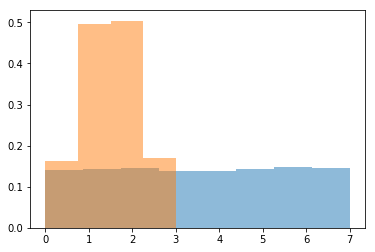

In [76]:
# Exercise 2

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

coinTosses = np.empty((0,3))

N = 10000
for n in range(N):
    threeTossSequence = np.array([[np.random.randint(0,2), 
                          np.random.randint(0,2), np.random.randint(0,2)]])
    coinTosses = np.append(coinTosses, threeTossSequence, axis = 0)

coinTosses8options = coinTosses[:,0]*4 + coinTosses[:,1]*2 + coinTosses[:,2]
tails = coinTosses[:,0] + coinTosses[:,1] + coinTosses[:,2]

plt.hist(coinTosses8options, bins = 8, density = True, alpha = 0.5)
plt.hist(tails, bins = 4, density = True, alpha = 0.5)

plt.show()

8.0266
9.9972
4.89802944458279
7.620485034431864


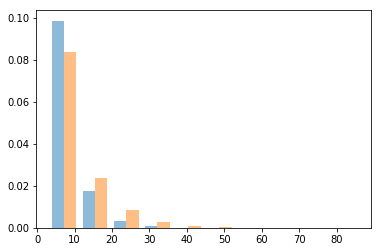

In [87]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 10000
waitTimes = np.empty((0,2))

for n in range(N):
    sequence0Found = False
    sequence1Found = False
    currentWaitTime = np.array([[0,0]])
    waitFor = [0,0]
    counter = 0
    while sequence0Found == False or sequence1Found == False:
        counter += 1
        toss = np.random.randint(0,2)
        
        if waitFor[0] == 2:
            if toss == 1:
                waitFor[0] = 3
                currentWaitTime[0,0] = counter
                sequence0Found = True
            else:
                waitFor[0] = 1
        else:
            if toss == 0 and waitFor[0] == 0:
                    waitFor[0] = 1
            elif toss == 1 and waitFor[0] == 1:
                    waitFor[0] = 2
                
        if waitFor[1] == 2:
            if toss == 0:
                waitFor[1] = 3
                currentWaitTime[0,1] = counter
                sequence1Found = True
            else:
                waitFor[1] = 0
        else:
            if toss == 0 and waitFor[1] == 0:
                waitFor[1] = 1
            elif toss == 1 and waitFor[1] == 1:
                waitFor[1] = 2
        
    waitTimes = np.append(waitTimes, currentWaitTime, axis = 0)
    
#011
#010

plt.hist(waitTimes, density = True, alpha = 0.5)

print(np.mean(waitTimes[:,0]))
print(np.mean(waitTimes[:,1]))
print(np.std(waitTimes[:,0]))
print(np.std(waitTimes[:,1]))

plt.show()